In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [17]:

# Load the MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images
X_train = X_train.reshape((X_train.shape[0], 28*28*1))
X_test = X_test.reshape((X_test.shape[0], 28*28*1))

In [22]:
# Add Gaussian noise to the images
noise_factor = 0.55
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# Clip the values to be in the [0, 1] range
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [23]:
# Define the denoising autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [24]:
# Compiling the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Training the denoising autoencoder
autoencoder.fit(X_train_noisy, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test_noisy, X_test))

# Using autoencoder's encoder part to get encoded representations of data.
encoder = Model(input_img, encoded)

# Using the autoencoder to denoise images by passing through noisy images
denoised_images = autoencoder.predict(X_test_noisy)

Epoch 1/50
235/235 [==============================] - 3s 8ms/step - loss: 0.2409 - val_loss: 0.1740
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1594 - val_loss: 0.1468
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1410 - val_loss: 0.1346
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1321 - val_loss: 0.1286
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1271 - val_loss: 0.1248
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1242 - val_loss: 0.1229
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1222 - val_loss: 0.1214
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1206 - val_loss: 0.1199
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1192 - val_loss: 0.1191
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1183 - val_loss: 0

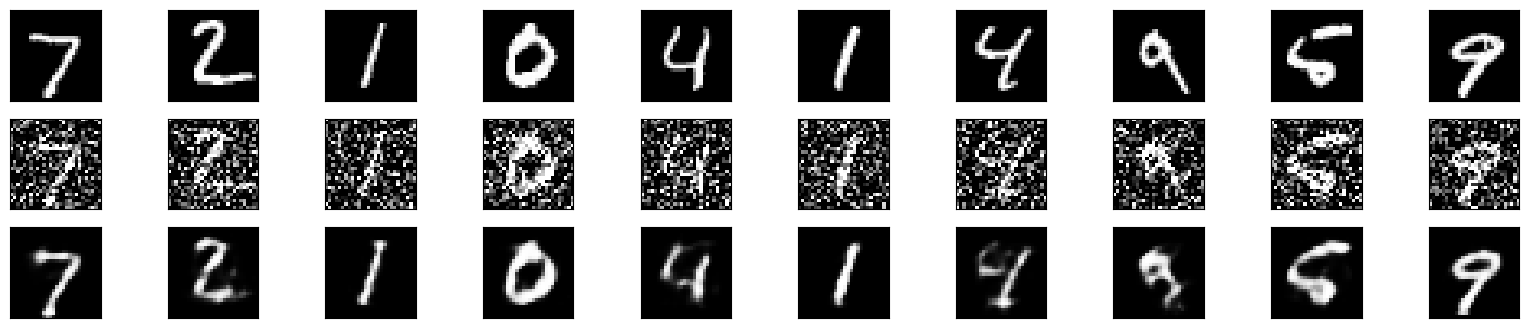

In [25]:
# Visualizing the original, noisy, and denoised images to see the results.
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy Images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised Images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()